In [ ]:
pip install google_play_scraper

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp36-none-any.whl size=22280 sha256=2bd12982ab0d6427db5f29f1ced160e32291f4a613bcca0443370b6df9a674d2
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.1-cp36-cp36m-linux_x86_64.whl size=149172 sha256=5d87e70e77fe118ed8c6894de2bb04aaf68d4492695c0763ebd4580755f4a27b
  Stored in directory: /root/.cache/pip/wheels/ae/69/ea/4798f98317cbab35d78fea64d36bd7b2b18faca88568ef15b0
Successfully built python-levenshtein


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=8c6362b3c5a814c6657d1087500289d127e741e8ec673fcfe0d44d45a9ecd15f
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
pip install twython

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm
import emoji
from gensim.parsing.preprocessing import remove_stopwords
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import Sort, reviews
from google.colab import files
sia=SentimentIntensityAnalyzer()

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews('co.tslc.cashe.android',lang='en',country='us',sort=Sort.NEWEST,count=40000)

In [ ]:
df=pd.DataFrame.from_dict(result)

In [ ]:
df.sort_values(by='at')

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
39999,gp:AOqpTOFieaCAhbXuZUIf52RK0Eon05de6RK49mmyBh9...,Raj sandhawalia,https://play-lh.googleusercontent.com/a-/AOh14...,Nice app,4,0,8.0.8,2019-02-12 11:16:19,"Hi Raj,\n\nWe are truly delighted by your feed...",2019-02-26 10:40:14
39998,gp:AOqpTOH4y8bxxh94zgDNtaQwX5UmrJithWEUpN0H52R...,PRADEEP KUMAR,https://play-lh.googleusercontent.com/a-/AOh14...,good ap,4,0,8.0.8,2019-02-12 11:38:37,"Hi Pradeep,\n\nThank You for choosing CASHe.\n...",2019-04-13 10:00:26
39997,gp:AOqpTOEGqESL12j2ATMTsaSYkQez691XPTN6dq4IzlT...,Dabang 4,https://play-lh.googleusercontent.com/a-/AOh14...,nice app,5,0,8.0.8,2019-02-12 12:07:38,"Hi Javed,\n\nThank You for choosing CASHe.\n\n...",2019-04-13 09:59:51
39996,gp:AOqpTOH2Y-vJkQ_sMYYw764VnbbgE3oqajWTVnHCIT_...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Guys dont use this because it's fake app it's ...,1,0,None,2019-02-12 13:34:39,"Hi,\n\nPlease elaborate your exact concern so ...",2019-04-12 10:45:14
39995,gp:AOqpTOGhqmmeuAM7uBzG4w663T3c_CfBUxim2suG7iq...,Geetha Shiva,https://play-lh.googleusercontent.com/a-/AOh14...,good app,5,0,8.0.8,2019-02-12 14:02:40,"Hi Geetha,\n\nThank You for choosing CASHe.\n\...",2019-04-12 10:44:18
...,...,...,...,...,...,...,...,...,...,...
4,gp:AOqpTOFih_4oByKRQaCJTyAm17pIPZca-jcj_tAR2Bc...,Anant Korake,https://play-lh.googleusercontent.com/-SM7kW5y...,Dear sir please I am due amount pay 24666 toda...,4,0,8.5.7,2021-01-22 16:22:21,None,NaT
3,gp:AOqpTOE3xPEZidKfgqADQrswk6_WfdDdAq65g_r0Cve...,Palanivel Gunasekaran,https://play-lh.googleusercontent.com/a-/AOh14...,Super,5,0,8.3.1,2021-01-22 17:08:24,None,NaT
2,gp:AOqpTOFvEDDzgNYr32ApLqWAizoeYcll9vp9oEzp-aH...,chaudhari jitu,https://play-lh.googleusercontent.com/-UUSt5V7...,Very cheap app...don't install application try...,1,0,8.5.7,2021-01-22 17:19:25,None,NaT
1,gp:AOqpTOGjiKXtdAAIRf86fC_PdIRvSCCEZzyD4oXrWEp...,Anju Kumari,https://play-lh.googleusercontent.com/a-/AOh14...,"app is very slow , and the customer care execu...",1,0,8.5.7,2021-01-22 18:04:54,None,NaT


In [ ]:
import datetime
x=datetime.datetime(2020,9,21)

In [ ]:
df=df.loc[df['at']>=x]

In [ ]:
df.count()

reviewId                8729
userName                8729
userImage               8729
content                 8729
score                   8729
thumbsUpCount           8729
reviewCreatedVersion    5394
at                      8729
replyContent            8555
repliedAt               8555
dtype: int64

In [ ]:
y=datetime.datetime.now()

In [ ]:
y-x

datetime.timedelta(123, 77255, 711817)

In [ ]:
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','at'],axis=1,inplace=True)

In [ ]:
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

100%|██████████| 8729/8729 [00:04<00:00, 1908.74it/s]


,content,score,cleaned
0,Fake app They will collect all the data includ...,1,fake app collect data including salary slips b...
1,"app is very slow , and the customer care execu...",1,app slow customer care executives answering pr...
2,Very cheap app...don't install application try...,1,cheap appdon't install application try otherap...
3,Super,5,super
4,Dear sir please I am due amount pay 24666 toda...,4,dear sir pay today fir bhi dikha raha hai plz ...


In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex
df.head()
df.to_csv('Nira_1year_2021-01-21 18:16:08.csv')
files.download('Nira_1year_2021-01-21 18:16:08.csv')

100%|██████████| 8729/8729 [00:19<00:00, 439.87it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1
print(count)
total=count
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

100%|██████████| 8729/8729 [00:00<00:00, 809607.70it/s]


5382


[('e', 0.9991527795791626),
 ('trust', 0.9990399479866028),
 ('tenure', 0.9989268183708191),
 ('overall', 0.9988670945167542),
 ('intrest', 0.9988199472427368),
 ('disbursement', 0.9988093376159668),
 ('lending', 0.9987735748291016),
 ('aap', 0.9986937642097473),
 ('fine', 0.9986915588378906),
 ('smooth', 0.9986608624458313),
 ('small', 0.9986375570297241),
 ('financial', 0.9986368417739868),
 ('google', 0.998620867729187),
 ('cashe', 0.9985804557800293),
 ('transfer', 0.9984954595565796),
 ('procedure', 0.9984054565429688),
 ('immediately', 0.9983530640602112),
 ('help', 0.9983140826225281),
 ('way', 0.9982880353927612),
 ('salaried', 0.9982662796974182),
 ('available', 0.9982630014419556),
 ('formality', 0.9982494711875916),
 ('critical', 0.9982378482818604),
 ('real', 0.9981486797332764),
 ('little', 0.9981455206871033),
 ('needy', 0.9981334209442139),
 ('well', 0.9981203675270081),
 ('experience', 0.9980971813201904),
 ('eligibility', 0.9980968236923218),
 ('finance', 0.99808311462

In [ ]:
total=count

In [ ]:
total

5382

In [ ]:
t=8729

100%|██████████| 8729/8729 [00:02<00:00, 3254.22it/s]



 362
6.726124117428466
{'neg': 0.11, 'neu': 0.592, 'pos': 0.298, 'compound': 1.0}


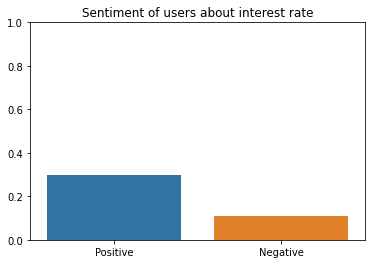

In [ ]:
t1=[]
t2=[]
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count*100/total)
t1.append(count*100/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

In [ ]:
df.count()

content      186080
score        186080
cleaned      186080
word__vec    186080
dtype: int64

100%|██████████| 8729/8729 [00:03<00:00, 2858.80it/s]

362 1328
3.6685082872928176


([<matplotlib.patches.Wedge at 0x7f1a4db91668>,
 [Text(-0.7369890475542995, 0.8166070926614626, ''),
  Text(0.7369890475542997, -0.8166070926614624, '')])

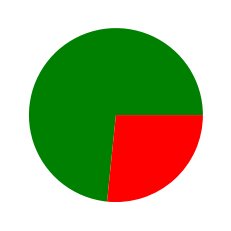

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
t2.append(pie)
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 8729/8729 [00:02<00:00, 3101.57it/s]

362 1328
3.6685082872928176


([<matplotlib.patches.Wedge at 0x7f1a4db1e780>,
 [Text(-0.7369890475542995, 0.8166070926614626, ''),
  Text(0.7369890475542997, -0.8166070926614624, '')])

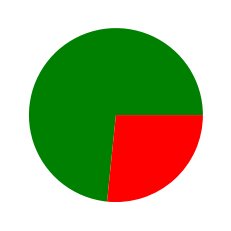

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 362/362 [00:00<00:00, 4559.41it/s]

283 160


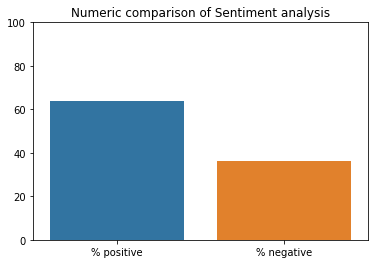

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

70
66
16
[46.05263157894737, 43.42105263157895, 10.526315789473683]


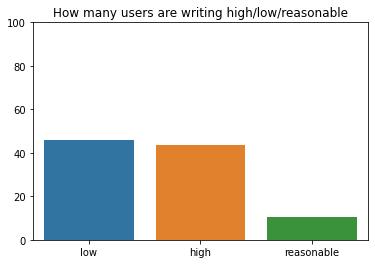

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

100%|██████████| 8729/8729 [00:02<00:00, 3117.78it/s]



 266
0.04942400594574508
{'neg': 0.144, 'neu': 0.637, 'pos': 0.219, 'compound': 0.9999}


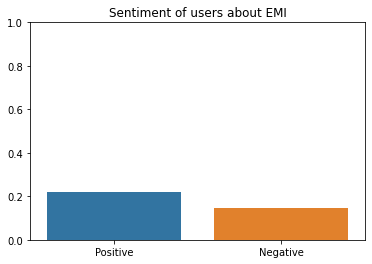

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 8729/8729 [00:03<00:00, 2848.99it/s]

266 766
2.8796992481203008


([<matplotlib.patches.Wedge at 0x7f1a4d978b70>,
 [Text(-0.2599468720011719, 1.068844059597473, ''),
  Text(0.25994687200117156, -1.0688440595974733, '')])

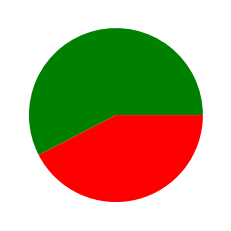

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 266/266 [00:00<00:00, 3512.80it/s]


205 160


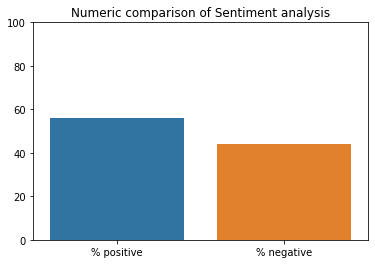

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

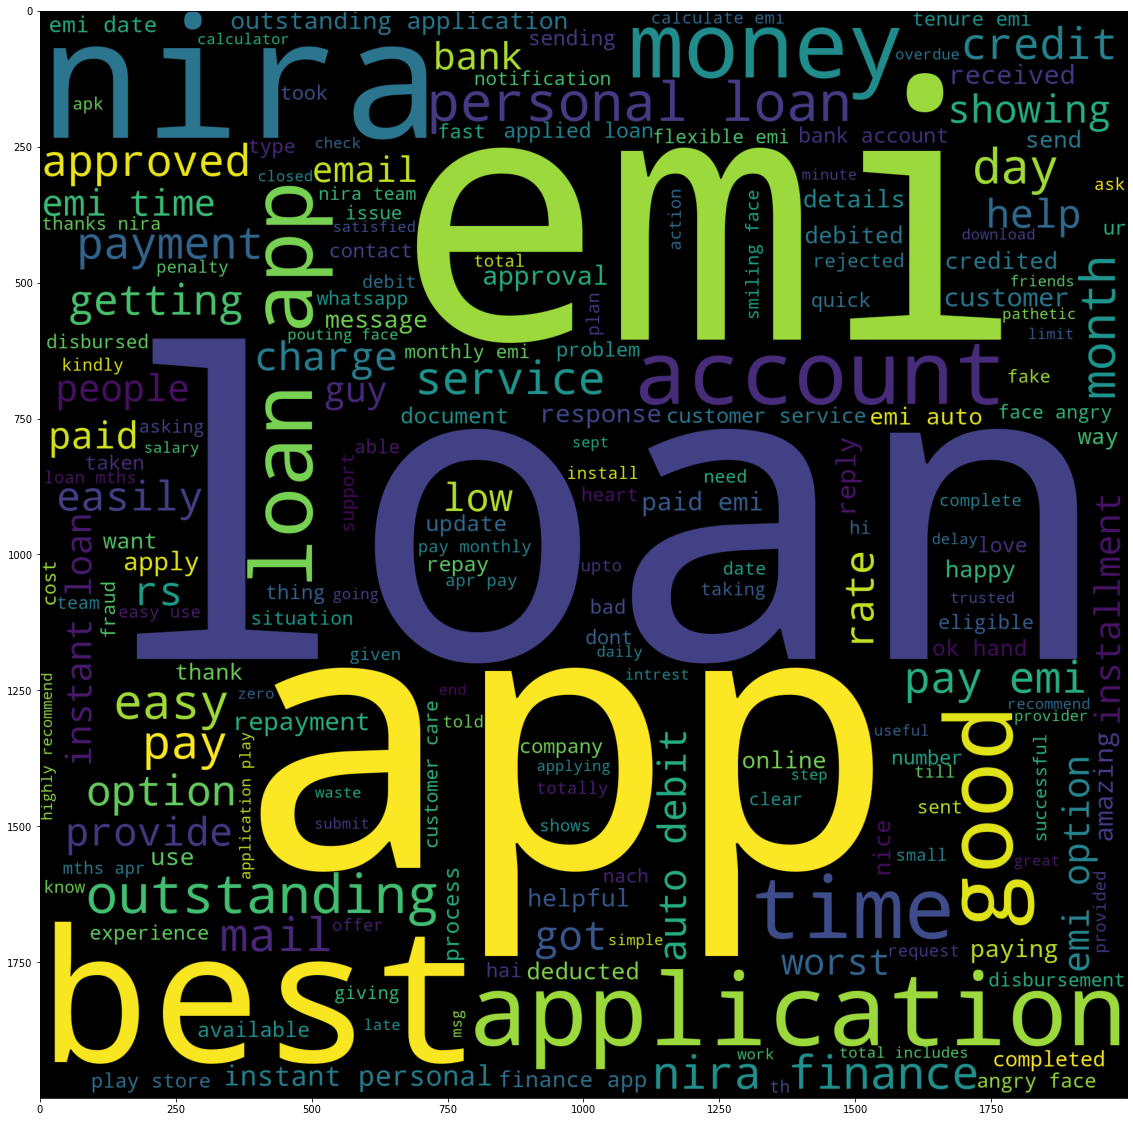

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = list(STOPWORDS)
stopwords=set(stopwords+['loan','app','application'])
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A2)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 8729/8729 [00:04<00:00, 2081.12it/s]



 379
0.0704199182460052
{'neg': 0.263, 'neu': 0.587, 'pos': 0.15, 'compound': -1.0}


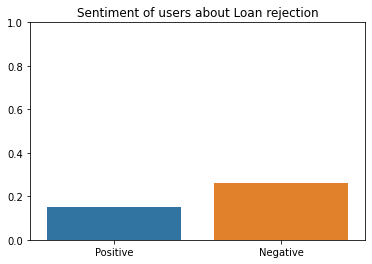

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

100%|██████████| 8729/8729 [00:04<00:00, 1922.15it/s]

379 635
1.675461741424802


([<matplotlib.patches.Wedge at 0x7f1a4de77160>,
 [Text(0.5447272511578527, 0.9556527726355477, ''),
  Text(-0.5447272511578528, -0.9556527726355476, '')])

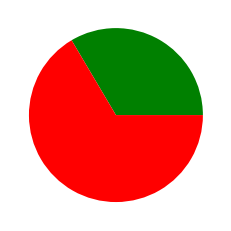

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 379/379 [00:00<00:00, 4000.67it/s]


236 343


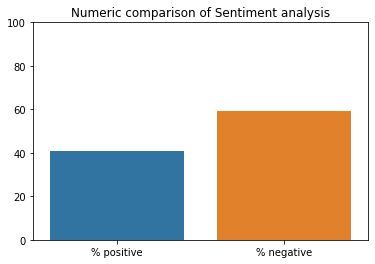

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 8729/8729 [00:03<00:00, 2466.23it/s]



 1251
23.244147157190636
{'neg': 0.131, 'neu': 0.55, 'pos': 0.319, 'compound': 1.0}


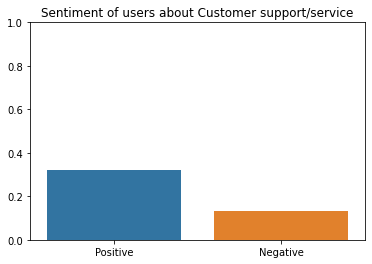

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count*100/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()

100%|██████████| 8729/8729 [00:03<00:00, 2306.18it/s]


 4351 1251
3.478017585931255


([<matplotlib.patches.Wedge at 0x7f1a4d6e4208>,
 [Text(-0.6342108999292984, 0.8987638924716934, ''),
  Text(0.6342108157809464, -0.8987639518507996, '')])

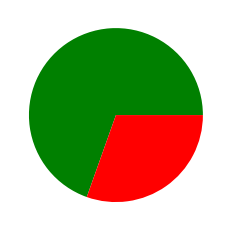

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

1069 522


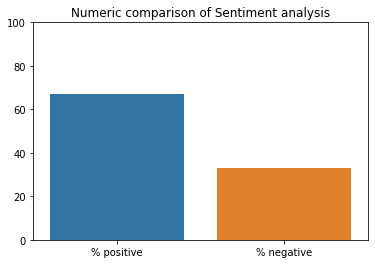

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 8729/8729 [00:05<00:00, 1589.66it/s]



 640 11.891490152359717
{'neg': 0.129, 'neu': 0.599, 'pos': 0.272, 'compound': 1.0}


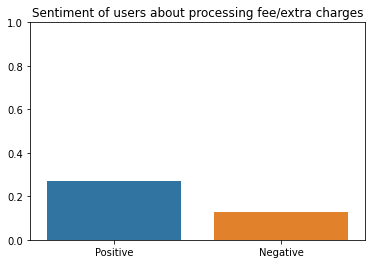

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count*100/total)
dic=sia.polarity_scores(review_about_A6)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/extra charges')
plt.show()

100%|██████████| 8729/8729 [00:05<00:00, 1500.30it/s]


 3.2203125


([<matplotlib.patches.Wedge at 0x7f1a4d6a0eb8>,
 [Text(-0.48102165091212856, 0.9892513186009764, ''),
  Text(0.4810217435325192, -0.989251273564475, '')])

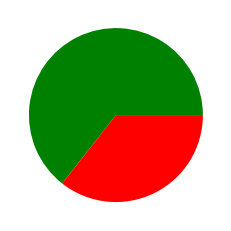

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 640/640 [00:00<00:00, 4110.05it/s]


512 330


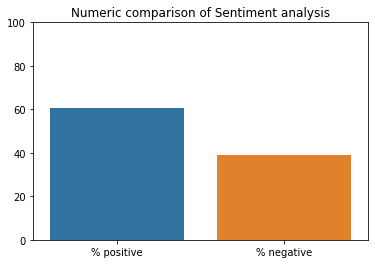

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A6):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 8729/8729 [00:04<00:00, 1854.20it/s]



 1713 0.31828316610925306
{'neg': 0.138, 'neu': 0.582, 'pos': 0.281, 'compound': 1.0}


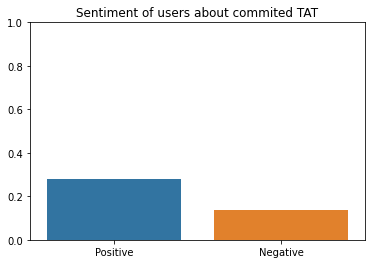

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  

100%|██████████| 8729/8729 [00:05<00:00, 1734.71it/s]


 1713 3.429655575014594


([<matplotlib.patches.Wedge at 0x7f1a4d5909b0>,
 [Text(-0.6066118095104012, 0.9176176287335139, ''),
  Text(0.6066117235968352, -0.9176176855286068, '')])

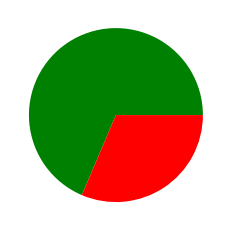

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

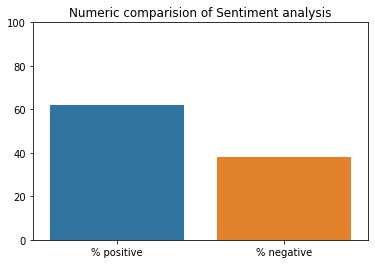

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

100%|██████████| 8729/8729 [00:03<00:00, 2236.92it/s]



 631 0.11724266072092158
{'neg': 0.291, 'neu': 0.547, 'pos': 0.161, 'compound': -1.0}


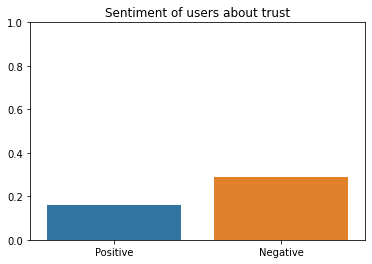

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 

100%|██████████| 8729/8729 [00:04<00:00, 2145.38it/s]


 631 1.6101426307448494


([<matplotlib.patches.Wedge at 0x7f1a4d4c0eb8>,
 [Text(0.5834787615854992, 0.9324980079220826, ''),
  Text(-0.5834787615854997, -0.9324980079220823, '')])

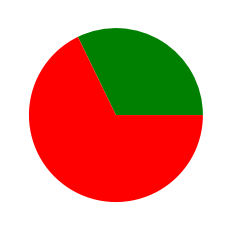

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

340 539


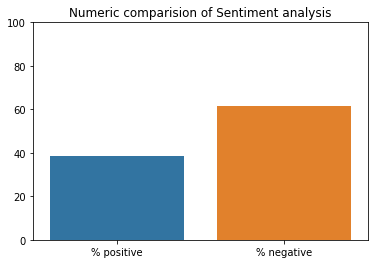

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()


100%|██████████| 8729/8729 [00:03<00:00, 2830.10it/s]



 125 0.023225566703827572
{'neg': 0.153, 'neu': 0.57, 'pos': 0.277, 'compound': 0.9999}


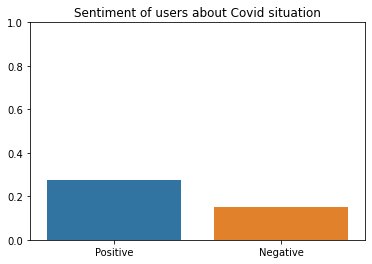

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 

100%|██████████| 8729/8729 [00:03<00:00, 2688.56it/s]


 125 3.6


([<matplotlib.patches.Wedge at 0x7f1a4d330f60>,
 [Text(-0.7011663061946446, 0.8475646353272168, ''),
  Text(0.7011662268399133, -0.8475647009751406, '')])

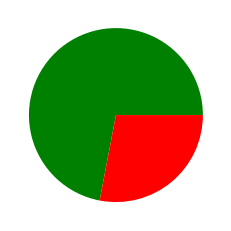

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

108 86


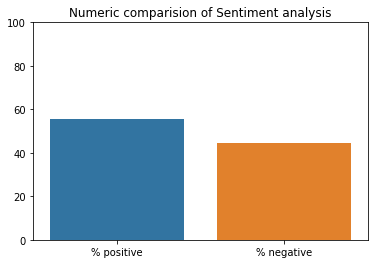

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

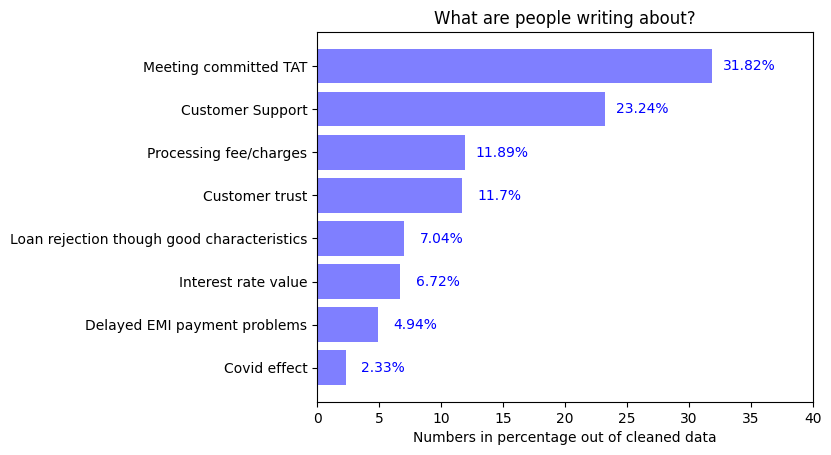

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[6.72,4.94,7.04,23.24,11.89,31.82,11.7,2.33]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,40)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

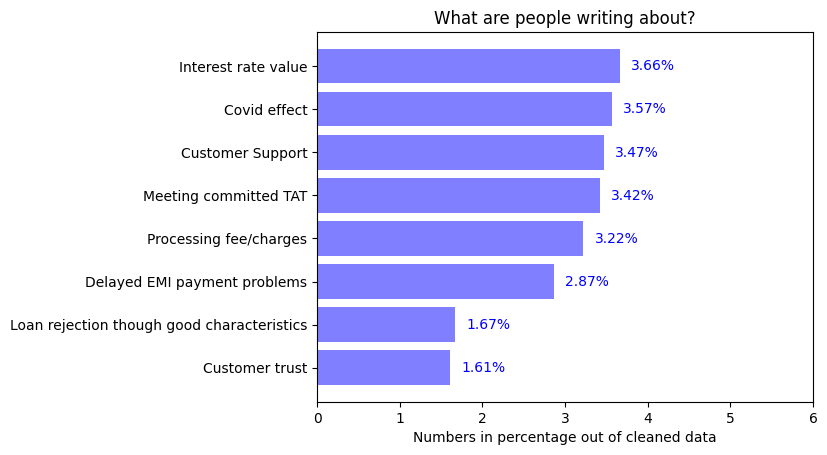

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[3.66,2.87,1.67,3.47,3.22,3.42,1.61,3.57]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,6)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

In [ ]:
df=pd.DataFrame.from_dict(result)

In [ ]:
df.sort_values(by='at')

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
31544,gp:AOqpTOG-4D-ZVdNRZ7cbzqagXebH-BGxkmMFmpHxVt5...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Such a user friendly app. Loved it !,5,7,None,2018-04-19 05:09:32,None,NaT
31543,gp:AOqpTOEUiy0jzbmrN43lEd7LCQzfBKRsbG1Rcq8uMez...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Quick, simple and easy to use. I am so glad to...",5,9,None,2018-04-19 07:38:33,None,NaT
31542,gp:AOqpTOH10P9-etnmuxcHu36UtKy0cNN9kND3WxXUyZU...,shekh khalid,https://play-lh.googleusercontent.com/-Bm3BH5Q...,Pathetic start,1,1,1.2.29,2018-04-21 04:59:11,"Hi Khalid, as discussed, your application was ...",2018-04-23 10:33:58
31541,gp:AOqpTOFpeZ32yVru8tD86Rz5whTjRu8YJ1t7eL2md_s...,SANKALP B,https://play-lh.googleusercontent.com/a-/AOh14...,yet another disappointing app. all hats and no...,1,2,1.2.29,2018-04-21 23:59:01,"Hi Sankalp, as discussed, your application was...",2018-04-23 10:33:20
31540,gp:AOqpTOHG00BUXheUKJGRq4weHGPmHvvYBpnujuEjCET...,Poonam Devi,https://play-lh.googleusercontent.com/a-/AOh14...,Simple and quick. Their customer care team wer...,5,8,None,2018-04-23 08:47:13,None,NaT
...,...,...,...,...,...,...,...,...,...,...
4,gp:AOqpTOFlbBSzengcoNXycfYZKg8nTtiXirUtWwj0I62...,Smart Siva,https://play-lh.googleusercontent.com/a-/AOh14...,"Waste of time, I submitted all valid documents...",1,0,6.4.5,2021-01-22 11:57:11,None,NaT
3,gp:AOqpTOHY7mtmTUS2QKAc_D_Rt-Lb3wPfK4PzNnueKOq...,Pravin Kumar,https://play-lh.googleusercontent.com/a-/AOh14...,Fake company,1,0,None,2021-01-22 12:16:04,None,NaT
2,gp:AOqpTOFjb_h_LQ6CrKKT4maKkYCnd0IaCd_L0afkiPG...,Ganesh Gadekar,https://play-lh.googleusercontent.com/-hS2wqgM...,Good working app,5,0,6.4.5,2021-01-22 13:39:38,None,NaT
1,gp:AOqpTOHOb2ICvJaDp-g6glEfvUQdWSMH3kwx89YTN2_...,Rahul Sable,https://play-lh.googleusercontent.com/-_PbX8hJ...,Vry poor service.no 1 ansured mail nd chat ove...,1,0,6.4.5,2021-01-22 13:45:53,None,NaT


In [ ]:
import datetime
x=datetime.datetime(2020,1,1)

In [ ]:
df=df.loc[df['at']>=x]

In [ ]:
df.count()

reviewId                22539
userName                22539
userImage               22539
content                 22539
score                   22539
thumbsUpCount           22539
reviewCreatedVersion    10218
at                      22539
replyContent             3578
repliedAt                3578
dtype: int64

In [ ]:
y=datetime.datetime.now()

In [ ]:
y-x

datetime.timedelta(387, 51738, 66042)

In [ ]:
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','at'],axis=1,inplace=True)

In [ ]:
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

100%|██████████| 22539/22539 [00:09<00:00, 2260.25it/s]


,content,score,cleaned
0,Nice,5,nice
1,Vry poor service.no 1 ansured mail nd chat ove...,1,vry poor serviceno ansured mail nd chat phone ...
2,Good working app,5,good working app
3,Fake company,1,fake company
4,"Waste of time, I submitted all valid documents...",1,waste time submitted valid documents telling h...


In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex
df.head()
df.to_csv('Nira_1year_2021-01-21 18:16:08.csv')
files.download('Nira_1year_2021-01-21 18:16:08.csv')

100%|██████████| 22539/22539 [00:43<00:00, 523.56it/s] 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1
print(count)
total=count
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

100%|██████████| 22539/22539 [00:00<00:00, 724131.89it/s]


13481


[('friendly', 0.9897571802139282),
 ('real', 0.9888079166412354),
 ('compare', 0.9882095456123352),
 ('clearly', 0.9880487322807312),
 ('make', 0.987334668636322),
 ('available', 0.9868217706680298),
 ('market', 0.9867886304855347),
 ('speed', 0.9862843751907349),
 ('lending', 0.9844859838485718),
 ('user', 0.9842270612716675),
 ('thought', 0.9840742349624634),
 ('loanvery', 0.9825775027275085),
 ('faster', 0.9818781018257141),
 ('marvelous', 0.9812825322151184),
 ('nirafinance', 0.9808927178382874),
 ('india', 0.9805141687393188),
 ('interst', 0.9794663786888123),
 ('approach', 0.9793491363525391),
 ('zero', 0.9787295460700989),
 ('matter', 0.9783910512924194),
 ('pace', 0.9781376719474792),
 ('outstanding', 0.9777922630310059),
 ('offer', 0.9772648811340332),
 ('appriciate', 0.9769484400749207),
 ('lone', 0.9768524169921875),
 ('unmatched', 0.9767000675201416),
 ('choose', 0.9763379096984863),
 ('choosen', 0.9763264656066895),
 ('appinstant', 0.9761884212493896),
 ('charge', 0.976088

In [ ]:
total=count

In [ ]:
total

13481

100%|██████████| 22539/22539 [00:06<00:00, 3432.86it/s]



 870
0.06453527186410504
{'neg': 0.07, 'neu': 0.526, 'pos': 0.404, 'compound': 1.0}


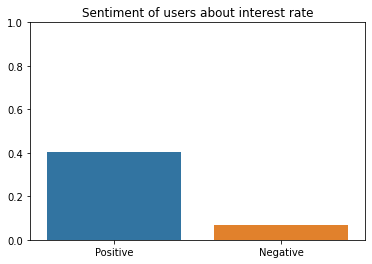

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

In [ ]:
t=22539

In [ ]:
df.count()

content      186080
score        186080
cleaned      186080
word__vec    186080
dtype: int64

100%|██████████| 22539/22539 [00:07<00:00, 3043.28it/s]

870 4160
4.781609195402299


([<matplotlib.patches.Wedge at 0x7f0b8e073a90>,
 [Text(-1.0896602594686362, 0.1504676674064718, ''),
  Text(1.0896602577076613, -0.1504676801591409, '')])

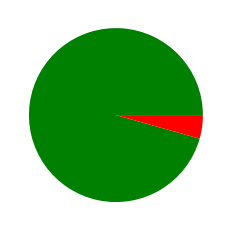

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 186080/186080 [00:53<00:00, 3493.45it/s]


3451 12313
3.5679513184584177


([<matplotlib.patches.Wedge at 0x7f9cb6bca0b8>,
 [Text(-0.6839581690375179, 0.8615110115412608, ''),
  Text(0.6839581690375178, -0.8615110115412608, '')])

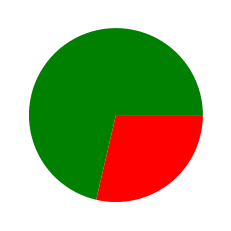

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 870/870 [00:00<00:00, 5447.95it/s]


755 384


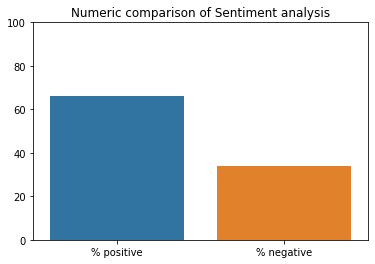

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

291
16
19
[89.2638036809816, 4.9079754601226995, 5.828220858895705]


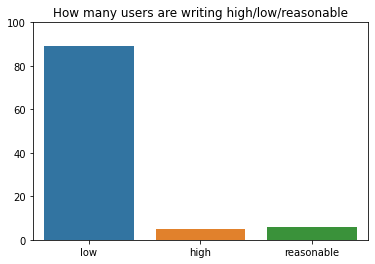

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

100%|██████████| 22539/22539 [00:06<00:00, 3346.40it/s]



 307
0.022772791335954307
{'neg': 0.132, 'neu': 0.593, 'pos': 0.275, 'compound': 1.0}


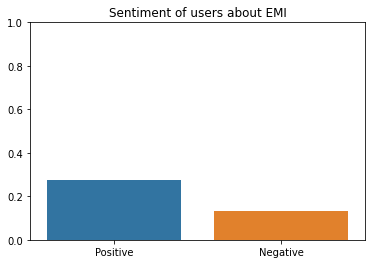

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 22539/22539 [00:07<00:00, 3014.44it/s]

307 1115
3.6319218241042344


([<matplotlib.patches.Wedge at 0x7f0b79db0898>,
 [Text(-0.7180238233362395, 0.8333317401381091, ''),
  Text(0.7180238233362397, -0.8333317401381088, '')])

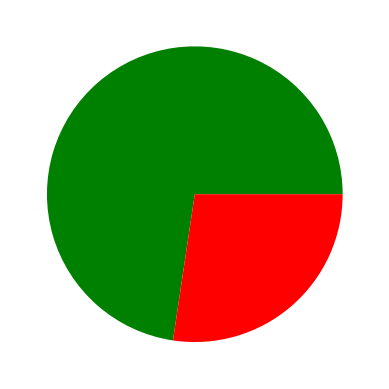

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 307/307 [00:00<00:00, 4025.76it/s]

253 160


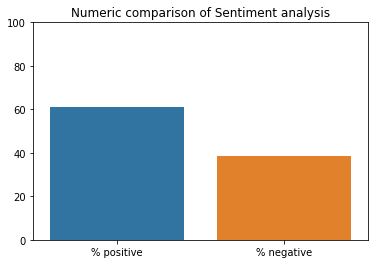

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

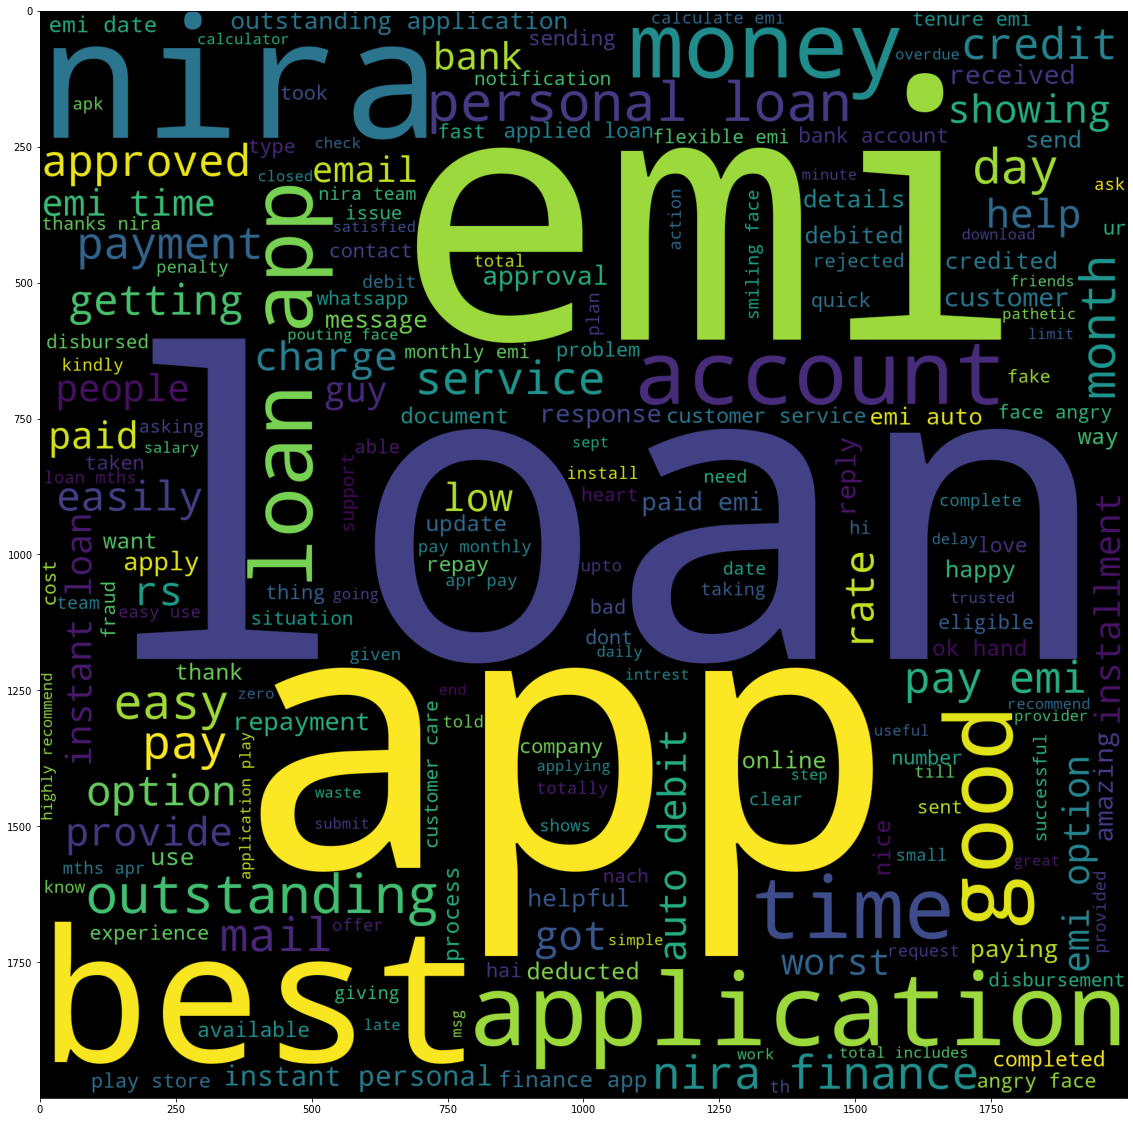

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = list(STOPWORDS)
stopwords=set(stopwords+['loan','app','application'])
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A2)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 22539/22539 [00:10<00:00, 2218.44it/s]



 290
0.021511757288035012
{'neg': 0.272, 'neu': 0.562, 'pos': 0.166, 'compound': -1.0}


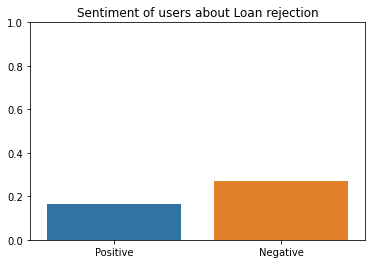

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

100%|██████████| 22539/22539 [00:11<00:00, 2041.53it/s]

290 570
1.9655172413793103


([<matplotlib.patches.Wedge at 0x7f0b7a9ce908>,
 [Text(0.36250344651486754, 1.038552478820807, ''),
  Text(-0.3625035437511671, -1.0385524448807801, '')])

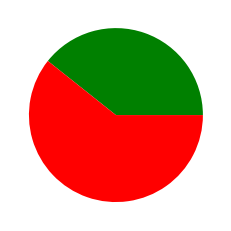

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 290/290 [00:00<00:00, 3817.71it/s]


185 230


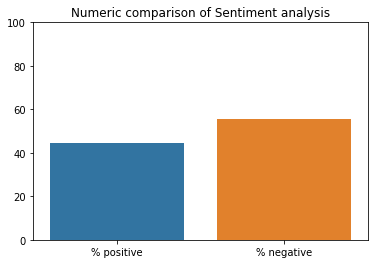

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 22539/22539 [00:08<00:00, 2684.48it/s]



 2458
18.233068763444848
{'neg': 0.075, 'neu': 0.509, 'pos': 0.416, 'compound': 1.0}


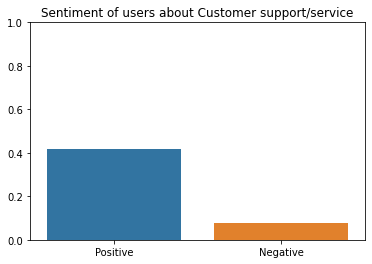

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count*100/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()

100%|██████████| 22539/22539 [00:09<00:00, 2465.42it/s]


 10340 2458
4.206672091131001


([<matplotlib.patches.Wedge at 0x7f0b7ab00470>,
 [Text(-0.9661505115055252, 0.5258832466599521, ''),
  Text(0.9661505853606299, -0.5258831109736386, '')])

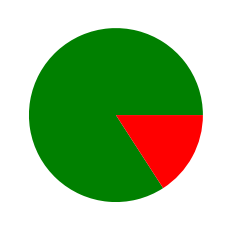

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

2222 628


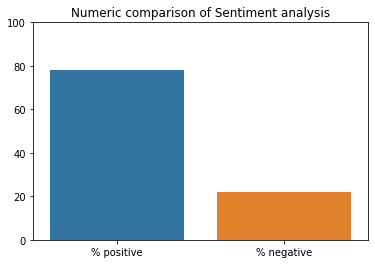

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 22539/22539 [00:13<00:00, 1731.54it/s]



 1041 0.07721979081670499
{'neg': 0.095, 'neu': 0.576, 'pos': 0.329, 'compound': 1.0}


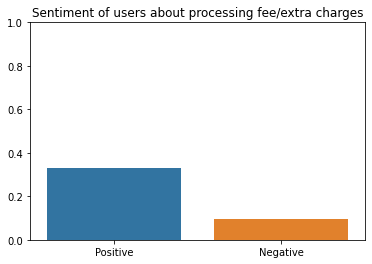

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count*100/total)
dic=sia.polarity_scores(review_about_A6)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/extra charges')
plt.show()

100%|██████████| 22539/22539 [00:13<00:00, 1630.38it/s]


 4.287223823246878


([<matplotlib.patches.Wedge at 0x7f0b7a65fe10>,
 [Text(-0.991517985126041, 0.4763319065227484, ''),
  Text(0.9915179851260408, -0.4763319065227486, '')])

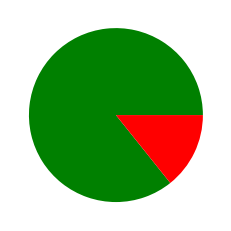

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 1041/1041 [00:00<00:00, 5018.13it/s]


854 442


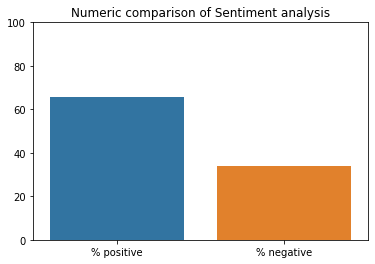

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A6):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 22539/22539 [00:11<00:00, 2027.17it/s]



 2703 0.2005044136191677
{'neg': 0.12, 'neu': 0.572, 'pos': 0.308, 'compound': 1.0}


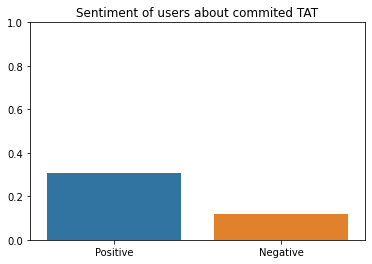

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  

100%|██████████| 22539/22539 [00:11<00:00, 1914.25it/s]


 2703 3.695893451720311


([<matplotlib.patches.Wedge at 0x7f0b79efd9e8>,
 [Text(-0.7509303902257678, 0.8038056662125345, ''),
  Text(0.7509304654834819, -0.8038055959053542, '')])

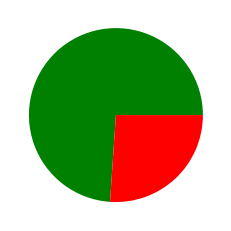

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

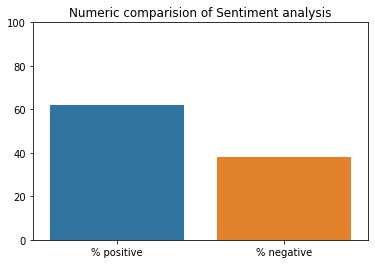

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

100%|██████████| 22539/22539 [00:09<00:00, 2455.08it/s]



 1178 0.08738224167346637
{'neg': 0.275, 'neu': 0.545, 'pos': 0.18, 'compound': -1.0}


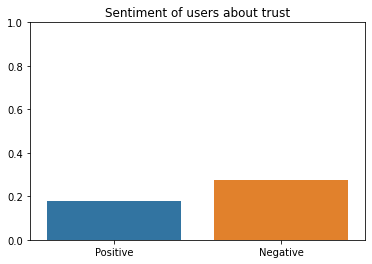

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 

100%|██████████| 22539/22539 [00:09<00:00, 2310.90it/s]


 1178 1.637521222410866


([<matplotlib.patches.Wedge at 0x7f0b7a408a58>,
 [Text(0.5673519131170717, 0.9423968414009032, ''),
  Text(-0.5673520013506295, -0.9423967882815791, '')])

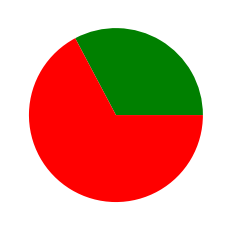

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

541 969


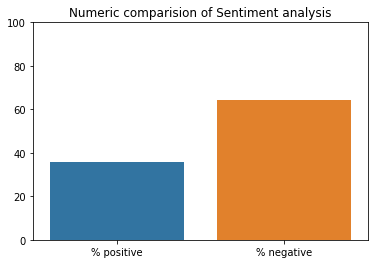

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()


100%|██████████| 22539/22539 [00:07<00:00, 3096.94it/s]



 158 0.011720198798308731
{'neg': 0.112, 'neu': 0.565, 'pos': 0.323, 'compound': 1.0}


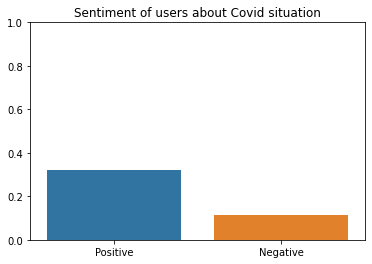

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 

100%|██████████| 22539/22539 [00:08<00:00, 2790.00it/s]


 158 4.386075949367089


([<matplotlib.patches.Wedge at 0x7f0b7a1f0dd8>,
 [Text(-1.0191723724664072, 0.4138691522706123, ''),
  Text(1.0191723918410192, -0.41386910455970993, '')])

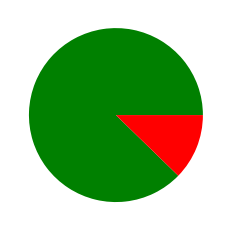

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

139 85


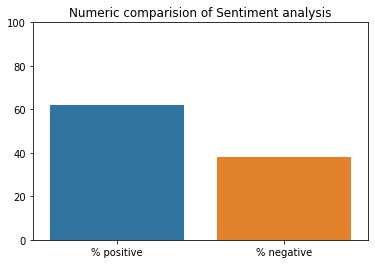

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

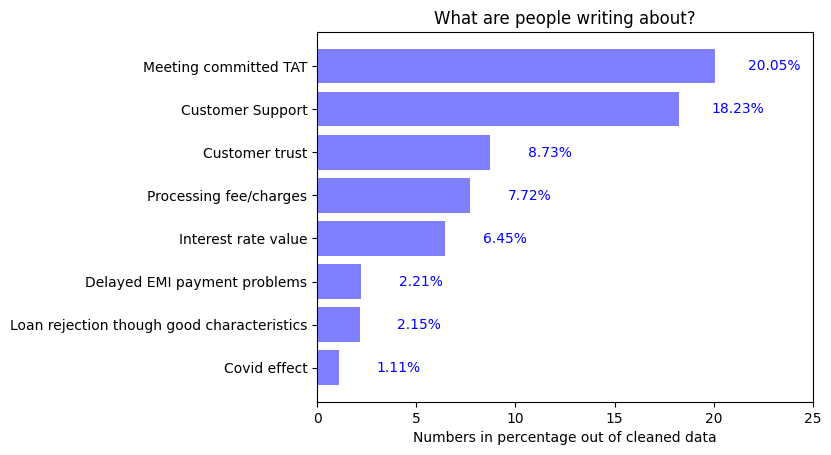

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[6.45,2.21,2.15,18.23,7.72,20.05,8.73,1.11]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,25)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

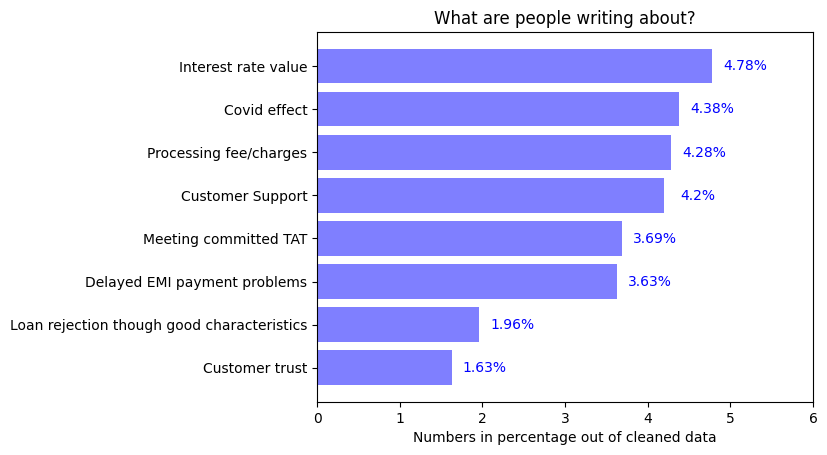

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[4.78,3.63,1.96,4.20,4.28,3.69,1.63,4.38]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,6)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()